## Filter WLASL100

In [4]:
import json
import os
import shutil

# Paths
json_file = '/Users/jakob/Library/CloudStorage/OneDrive-Personal/Dokumente/Uni/Koeln/Semester 3/DeepLearning/WLASL_v0.3.json' 
video_dir = '/Users/jakob/Library/CloudStorage/OneDrive-Personal/Dokumente/Uni/Koeln/Semester 3/DeepLearning/WLASL2000'  # Directory containing all videos
output_dir = '/Users/jakob/Documents/GitHub/ADA/WLASL100'  # Output directory for WLASL100 videos

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Load the WLASL JSON file
with open(json_file, 'r') as file:
    wlasl_data = json.load(file)

# Count occurrences of each gloss
gloss_counts = {}
for entry in wlasl_data:
    gloss = entry['gloss']
    gloss_counts[gloss] = gloss_counts.get(gloss, 0) + 1

# Identify top 100 glosses
top_100_glosses = sorted(gloss_counts.keys(), key=lambda x: gloss_counts[x], reverse=True)[:100]

# Filter instances for top 100 glosses
wlasl100 = [entry for entry in wlasl_data if entry['gloss'] in top_100_glosses]

# Save the filtered JSON for WLASL100
wlasl100_json_path = os.path.join(output_dir, 'WLASL100.json')
with open(wlasl100_json_path, 'w') as file:
    json.dump(wlasl100, file, indent=4)

print(f"Filtered WLASL100 dataset with {len(wlasl100)} entries saved to {wlasl100_json_path}.")

# Organize videos for WLASL100
for entry in wlasl100:
    gloss = entry['gloss']
    gloss_dir = os.path.join(output_dir, gloss)
    os.makedirs(gloss_dir, exist_ok=True)

    for instance in entry['instances']:
        video_id = instance['video_id']
        source_path = os.path.join(video_dir, f"{video_id}.mp4")
        target_path = os.path.join(gloss_dir, f"{video_id}.mp4")
        
        if os.path.exists(source_path):
            shutil.copy(source_path, target_path)
            print(f"Copied {source_path} to {target_path}")
        else:
            print(f"Missing video: {source_path}")

print(f"Videos for WLASL100 have been organized in {output_dir}.")


Filtered WLASL100 dataset with 100 entries saved to /Users/jakob/Documents/GitHub/ADA/WLASL100/WLASL100.json.
Copied /Users/jakob/Library/CloudStorage/OneDrive-Personal/Dokumente/Uni/Koeln/Semester 3/DeepLearning/WLASL2000/69241.mp4 to /Users/jakob/Documents/GitHub/ADA/WLASL100/book/69241.mp4
Copied /Users/jakob/Library/CloudStorage/OneDrive-Personal/Dokumente/Uni/Koeln/Semester 3/DeepLearning/WLASL2000/65225.mp4 to /Users/jakob/Documents/GitHub/ADA/WLASL100/book/65225.mp4
Copied /Users/jakob/Library/CloudStorage/OneDrive-Personal/Dokumente/Uni/Koeln/Semester 3/DeepLearning/WLASL2000/68011.mp4 to /Users/jakob/Documents/GitHub/ADA/WLASL100/book/68011.mp4
Copied /Users/jakob/Library/CloudStorage/OneDrive-Personal/Dokumente/Uni/Koeln/Semester 3/DeepLearning/WLASL2000/68208.mp4 to /Users/jakob/Documents/GitHub/ADA/WLASL100/book/68208.mp4
Copied /Users/jakob/Library/CloudStorage/OneDrive-Personal/Dokumente/Uni/Koeln/Semester 3/DeepLearning/WLASL2000/68012.mp4 to /Users/jakob/Documents/GitHu

## PreProcess Videos

In [2]:
import os
import json
import shutil

def organize_splits(json_path, videos_dir, output_dir):
    """Organize videos into train, val, and test splits."""
    with open(json_path, "r") as file:
        wlasl_data = json.load(file)

    for gloss_entry in wlasl_data:
        gloss = gloss_entry["gloss"]
        gloss_dir = os.path.join(videos_dir, gloss)  # Subfolder for each gloss

        for instance in gloss_entry["instances"]:
            video_id = instance["video_id"]
            split = instance["split"]

            # Paths
            src_video_path = os.path.join(gloss_dir, f"{video_id}.mp4")
            dest_dir = os.path.join(output_dir, split, gloss)
            dest_video_path = os.path.join(dest_dir, f"{video_id}.mp4")

            # Skip missing videos
            if not os.path.exists(src_video_path):
                print(f"Missing video: {src_video_path}")
                continue

            # Create destination directory
            os.makedirs(dest_dir, exist_ok=True)

            # Copy video
            shutil.copy(src_video_path, dest_video_path)
            print(f"Copied {src_video_path} to {dest_video_path}")

# Example usage
json_path = "/Users/jakob/Documents/GitHub/ADA/WLASL100/WLASL100.json"
videos_dir = "/Users/jakob/Documents/GitHub/ADA/WLASL100"
output_dir = "/Users/jakob/Documents/GitHub/ADA/WLASL100_organized"
organize_splits(json_path, videos_dir, output_dir)

Copied /Users/jakob/Documents/GitHub/ADA/WLASL100/book/69241.mp4 to /Users/jakob/Documents/GitHub/ADA/WLASL100_organized/train/book/69241.mp4
Copied /Users/jakob/Documents/GitHub/ADA/WLASL100/book/65225.mp4 to /Users/jakob/Documents/GitHub/ADA/WLASL100_organized/train/book/65225.mp4
Copied /Users/jakob/Documents/GitHub/ADA/WLASL100/book/68011.mp4 to /Users/jakob/Documents/GitHub/ADA/WLASL100_organized/train/book/68011.mp4
Copied /Users/jakob/Documents/GitHub/ADA/WLASL100/book/68208.mp4 to /Users/jakob/Documents/GitHub/ADA/WLASL100_organized/train/book/68208.mp4
Copied /Users/jakob/Documents/GitHub/ADA/WLASL100/book/68012.mp4 to /Users/jakob/Documents/GitHub/ADA/WLASL100_organized/train/book/68012.mp4
Copied /Users/jakob/Documents/GitHub/ADA/WLASL100/book/70212.mp4 to /Users/jakob/Documents/GitHub/ADA/WLASL100_organized/val/book/70212.mp4
Copied /Users/jakob/Documents/GitHub/ADA/WLASL100/book/70266.mp4 to /Users/jakob/Documents/GitHub/ADA/WLASL100_organized/train/book/70266.mp4
Copied /

In [37]:
import os

# Dynamically create gloss_to_index mapping from training directory
train_dir = "/Users/jakob/Documents/GitHub/ADA/WLASL100_organized/train"
all_glosses = sorted(os.listdir(train_dir))  # Get all gloss folder names
gloss_to_index = {gloss: idx for idx, gloss in enumerate(all_glosses)}

print("Gloss-to-Index Mapping:", gloss_to_index)

Gloss-to-Index Mapping: {'.DS_Store': 0, 'accident': 1, 'africa': 2, 'all': 3, 'apple': 4, 'basketball': 5, 'bed': 6, 'before': 7, 'bird': 8, 'birthday': 9, 'black': 10, 'blue': 11, 'book': 12, 'bowling': 13, 'brown': 14, 'but': 15, 'can': 16, 'candy': 17, 'chair': 18, 'change': 19, 'cheat': 20, 'city': 21, 'clothes': 22, 'color': 23, 'computer': 24, 'cook': 25, 'cool': 26, 'corn': 27, 'cousin': 28, 'cow': 29, 'dance': 30, 'dark': 31, 'deaf': 32, 'decide': 33, 'doctor': 34, 'dog': 35, 'drink': 36, 'eat': 37, 'enjoy': 38, 'family': 39, 'fine': 40, 'finish': 41, 'fish': 42, 'forget': 43, 'full': 44, 'give': 45, 'go': 46, 'graduate': 47, 'hat': 48, 'hearing': 49, 'help': 50, 'hot': 51, 'how': 52, 'jacket': 53, 'kiss': 54, 'language': 55, 'last': 56, 'later': 57, 'letter': 58, 'like': 59, 'man': 60, 'many': 61, 'medicine': 62, 'meet': 63, 'mother': 64, 'need': 65, 'no': 66, 'now': 67, 'orange': 68, 'paint': 69, 'paper': 70, 'pink': 71, 'pizza': 72, 'play': 73, 'pull': 74, 'purple': 75, 'ri

In [95]:
import torch
import numpy as np
from torch.utils.data import Dataset
from transformers import AutoImageProcessor
import av

class WLASLDataset(Dataset):
    def __init__(self, root_dir, processor, num_frames=8, gloss_to_index=None):
        self.root_dir = root_dir
        self.processor = processor
        self.num_frames = num_frames
        self.gloss_to_index = gloss_to_index
        self.data = []
        self.labels = []

        for gloss in os.listdir(root_dir):
            gloss_dir = os.path.join(root_dir, gloss)
            if not os.path.isdir(gloss_dir):
                continue
            if gloss not in self.gloss_to_index:
                print(f"Gloss '{gloss}' not found in gloss_to_index")
                continue
            for video in os.listdir(gloss_dir):
                self.data.append(os.path.join(gloss_dir, video))
                self.labels.append(self.gloss_to_index[gloss])  # Convert gloss to integer

        print(f"Initialized dataset with {len(self.data)} videos and labels.")
        print(f"Sample labels: {self.labels[:5]}")
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        video_path = self.data[idx]
        label = self.labels[idx]
        frames = self.load_video(video_path)
        return frames, torch.tensor(label)  # Convert label to tensor


    def load_video(self, video_path):
        container = av.open(video_path)
        total_frames = container.streams.video[0].frames

        # Sample evenly spaced frames
        indices = np.linspace(0, total_frames - 1, self.num_frames).astype(np.int64)
        frames = []
        for i, frame in enumerate(container.decode(video=0)):
            if i in indices:
                frame = frame.to_ndarray(format="rgb24")
                frames.append(frame)

        # Preprocess frames
        processed_frames = self.processor(frames, return_tensors="pt")["pixel_values"]
        return processed_frames


In [140]:
from torch.utils.data import DataLoader

processor = AutoImageProcessor.from_pretrained("facebook/timesformer-base-finetuned-k400")

train_dataset = WLASLDataset(
    root_dir="/Users/jakob/Documents/GitHub/ADA/WLASL100_organized/train", 
    processor=processor, 
    num_frames=52, 
    gloss_to_index=gloss_to_index
)
val_dataset = WLASLDataset(
    root_dir="/Users/jakob/Documents/GitHub/ADA/WLASL100_organized/val", 
    processor=processor, 
    num_frames=52, 
    gloss_to_index=gloss_to_index
)
test_dataset = WLASLDataset(
    root_dir="/Users/jakob/Documents/GitHub/ADA/WLASL100_organized/test", 
    processor=processor, 
    num_frames=52, 
    gloss_to_index=gloss_to_index
)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4)
test_loader = DataLoader(test_dataset, batch_size=4)

Initialized dataset with 1442 videos and labels.
Sample labels: [4, 4, 4, 4, 4]
Initialized dataset with 338 videos and labels.
Sample labels: [4, 4, 4, 1, 1]
Initialized dataset with 258 videos and labels.
Sample labels: [4, 4, 1, 1, 1]


## Fine Tune TimeSformer

In [137]:
import torch

def identify_device():
    # look for cuda
    if torch.cuda.is_available():
        device = torch.device("cuda")
        print(f"Using GPU: {torch.cuda.get_device_name(0)}")
    # look for MPS (Apple Silicon GPU)
    elif hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
        device = torch.device("mps")
        print(f"Using 'Apple Silicion' GPU.")
    else:
        device = torch.device("cpu")
        print(f"No GPU availabe. Using CPU")
    return device

device = identify_device()

Using 'Apple Silicion' GPU.


In [132]:
from transformers import TimesformerForVideoClassification

# Load the pretrained model and ignore mismatched classifier sizes
model = TimesformerForVideoClassification.from_pretrained(
    "facebook/timesformer-base-finetuned-k400",
    num_labels=100,  # Set the number of classes to match your dataset
    ignore_mismatched_sizes=True,  # Ignore the mismatch in classifier size
)

# Move the model to the GPU (if available)
device = identify_device()
model.to(device)

Some weights of TimesformerForVideoClassification were not initialized from the model checkpoint at facebook/timesformer-base-finetuned-k400 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([400, 768]) in the checkpoint and torch.Size([100, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([400]) in the checkpoint and torch.Size([100]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using 'Apple Silicion' GPU.


TimesformerForVideoClassification(
  (timesformer): TimesformerModel(
    (embeddings): TimesformerEmbeddings(
      (patch_embeddings): TimesformerPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (time_drop): Dropout(p=0.0, inplace=False)
    )
    (encoder): TimesformerEncoder(
      (layer): ModuleList(
        (0-11): 12 x TimesformerLayer(
          (drop_path): Identity()
          (attention): TimeSformerAttention(
            (attention): TimesformerSelfAttention(
              (qkv): Linear(in_features=768, out_features=2304, bias=True)
              (attn_drop): Dropout(p=0.0, inplace=False)
            )
            (output): TimesformerSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): TimesformerIntermediate(
            (dense

In [133]:
for videos, labels in train_loader:
    print(f"Videos Shape: {videos.shape}")
    break


Videos Shape: torch.Size([4, 1, 50, 3, 224, 224])


In [138]:
for videos, labels in train_loader:
    videos = videos.squeeze(1)  # Remove extra dimension
    print(f"Corrected Videos Shape: {videos.shape}")
    break


Corrected Videos Shape: torch.Size([4, 50, 3, 224, 224])


In [98]:
from transformers import AdamW

# Define optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

model.train()
for epoch in range(1):  # Adjust the number of epochs as needed
    total_loss = 0
    for videos, labels in train_loader:
        # Remove the extra dimension and move to device
        videos = videos.squeeze(1).to(device)
        labels = labels.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(pixel_values=videos, labels=labels)
        loss = outputs.loss
        loss.backward()

        # Update weights
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader)}")


RuntimeError: shape '[4, 22, 14, 8, 768]' is invalid for input of size 7827456

In [103]:
import torch
import numpy as np

# Freeze all layers except the classifier
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the classifier layer
for param in model.classifier.parameters():
    param.requires_grad = True

# Verify trainable parameters
print("Trainable Parameters:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)

# Define optimizer
optimizer = torch.optim.AdamW(model.classifier.parameters(), lr=1e-3)  # Only update the classifier

# Early stopping parameters
patience = 20  # Stop training if no improvement for 10 epochs
best_val_accuracy = 0
epochs_no_improve = 0
max_epochs = 200

for epoch in range(max_epochs):
    # Training phase
    model.train()
    total_loss = 0
    for videos, labels in train_loader:
        videos = videos.squeeze(1).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(pixel_values=videos, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader)}")

    # Validation phase
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for videos, labels in val_loader:
            videos = videos.squeeze(1).to(device)
            labels = labels.to(device)
            outputs = model(pixel_values=videos)
            predictions = outputs.logits.argmax(dim=-1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
    val_accuracy = correct / total
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Check for improvement
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        epochs_no_improve = 0
        # Save the best model
        torch.save(model.state_dict(), "best_model.pt")
        print("Validation accuracy improved, saving model.")
    else:
        epochs_no_improve += 1
        print(f"No improvement for {epochs_no_improve} epochs.")

    # Early stopping
    if epochs_no_improve >= patience:
        print("Early stopping triggered.")
        break

Trainable Parameters:
classifier.weight
classifier.bias
Epoch 1, Loss: 4.508650903226266
Validation Accuracy: 0.1509
Validation accuracy improved, saving model.
Epoch 2, Loss: 2.7566010279998885
Validation Accuracy: 0.2012
Validation accuracy improved, saving model.
Epoch 3, Loss: 1.9883520419082483
Validation Accuracy: 0.2071
Validation accuracy improved, saving model.
Epoch 4, Loss: 1.4507319614332468
Validation Accuracy: 0.2249
Validation accuracy improved, saving model.
Epoch 5, Loss: 1.1107094391065953
Validation Accuracy: 0.2604
Validation accuracy improved, saving model.
Epoch 6, Loss: 0.85403704245954
Validation Accuracy: 0.2633
Validation accuracy improved, saving model.
Epoch 7, Loss: 0.6817187695890418
Validation Accuracy: 0.2840
Validation accuracy improved, saving model.
Epoch 8, Loss: 0.5470500762195138
Validation Accuracy: 0.3047
Validation accuracy improved, saving model.
Epoch 9, Loss: 0.446433388264308
Validation Accuracy: 0.3136
Validation accuracy improved, saving m

ValueError: Unable to create tensor, you should probably activate padding with 'padding=True' to have batched tensors with the same length.

In [88]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for videos, labels in test_loader:
        videos = videos.squeeze(1).to(device)
        labels = torch.tensor([int(label) for label in labels]).to(device)
        outputs = model(pixel_values=videos)
        predictions = outputs.logits.argmax(dim=-1)
        correct += (predictions == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {correct / total:.2%}")


Test Accuracy: 3.10%


## Test 32 frames

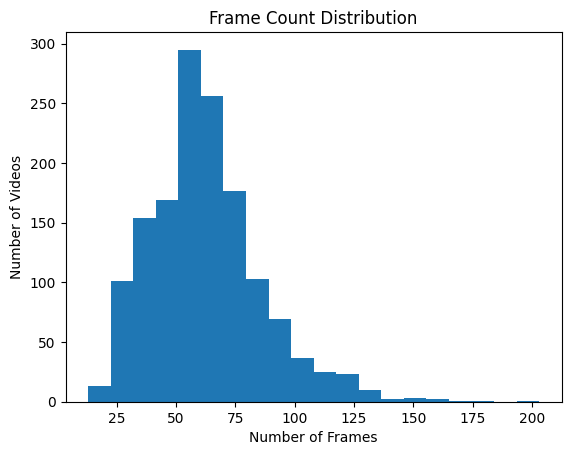

In [104]:
import os
import av
import matplotlib.pyplot as plt

frame_counts = []

# Path to your videos directory
videos_dir = "/Users/jakob/Documents/GitHub/ADA/WLASL100_organized/train"

for gloss in os.listdir(videos_dir):
    gloss_dir = os.path.join(videos_dir, gloss)
    if not os.path.isdir(gloss_dir):
        continue
    for video in os.listdir(gloss_dir):
        video_path = os.path.join(gloss_dir, video)
        container = av.open(video_path)
        total_frames = container.streams.video[0].frames
        frame_counts.append(total_frames)

# Plot frame count distribution
plt.hist(frame_counts, bins=20)
plt.xlabel("Number of Frames")
plt.ylabel("Number of Videos")
plt.title("Frame Count Distribution")
plt.show()


In [111]:
import torch
import numpy as np
from torch.utils.data import Dataset
from transformers import AutoImageProcessor
import av

def pad_or_sample_frames(frames, target_frames):
    if len(frames) < target_frames:
        # Duplicate last frame to meet the required number
        while len(frames) < target_frames:
            frames.append(frames[-1])
    elif len(frames) > target_frames:
        # Sample evenly spaced frames
        indices = np.linspace(0, len(frames) - 1, num=target_frames).astype(np.int64)
        frames = [frames[i] for i in indices]
    return frames

class WLASLDataset(Dataset):
    def __init__(self, root_dir, processor, num_frames=8, gloss_to_index=None):
        self.root_dir = root_dir
        self.processor = processor
        self.num_frames = num_frames
        self.gloss_to_index = gloss_to_index
        self.data = []
        self.labels = []

        for gloss in os.listdir(root_dir):
            gloss_dir = os.path.join(root_dir, gloss)
            if not os.path.isdir(gloss_dir):
                continue
            if gloss not in self.gloss_to_index:
                print(f"Gloss '{gloss}' not found in gloss_to_index")
                continue
            for video in os.listdir(gloss_dir):
                self.data.append(os.path.join(gloss_dir, video))
                self.labels.append(self.gloss_to_index[gloss])  # Convert gloss to integer

        print(f"Initialized dataset with {len(self.data)} videos and labels.")
        print(f"Sample labels: {self.labels[:5]}")
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        video_path = self.data[idx]
        label = self.labels[idx]
        frames = self.load_video(video_path)
        return frames, torch.tensor(label)  # Convert label to tensor


    def load_video(self, video_path):
        container = av.open(video_path)
        total_frames = container.streams.video[0].frames

        # Decode all frames
        frames = []
        for frame in container.decode(video=0):
            frames.append(frame.to_ndarray(format="rgb24"))

        # Pad or sample frames to ensure the target number of frames
        frames = pad_or_sample_frames(frames, self.num_frames)

        # Preprocess frames
        processed_frames = self.processor(frames, return_tensors="pt")["pixel_values"]
        return processed_frames

In [114]:
import torch
import numpy as np

# Freeze all layers except the classifier
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the classifier layer
for param in model.classifier.parameters():
    param.requires_grad = True

# Verify trainable parameters
print("Trainable Parameters:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)

# Define optimizer
optimizer = torch.optim.AdamW(model.classifier.parameters(), lr=1e-3)  # Only update the classifier

# Early stopping parameters
patience = 20  # Stop training if no improvement for 10 epochs
best_val_accuracy = 0
epochs_no_improve = 0
max_epochs = 200

for epoch in range(max_epochs):
    # Training phase
    model.train()
    total_loss = 0
    for videos, labels in train_loader:
        videos = videos.squeeze(1).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(pixel_values=videos, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader)}")

    # Validation phase
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for videos, labels in val_loader:
            videos = videos.squeeze(1).to(device)
            labels = labels.to(device)
            outputs = model(pixel_values=videos)
            predictions = outputs.logits.argmax(dim=-1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
    val_accuracy = correct / total
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Check for improvement
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        epochs_no_improve = 0
        # Save the best model
        torch.save(model.state_dict(), "best_model.pt")
        print("Validation accuracy improved, saving model.")
    else:
        epochs_no_improve += 1
        print(f"No improvement for {epochs_no_improve} epochs.")

    # Early stopping
    if epochs_no_improve >= patience:
        print("Early stopping triggered.")
        break

Trainable Parameters:
classifier.weight
classifier.bias
Epoch 1, Loss: 4.519934858311577
Validation Accuracy: 0.1361
Validation accuracy improved, saving model.
Epoch 2, Loss: 2.7437706588047694
Validation Accuracy: 0.1746
Validation accuracy improved, saving model.
Epoch 3, Loss: 1.9537827528579743
Validation Accuracy: 0.2219
Validation accuracy improved, saving model.
Epoch 4, Loss: 1.441140102299957
Validation Accuracy: 0.2367
Validation accuracy improved, saving model.
Epoch 5, Loss: 1.1037782508250418
Validation Accuracy: 0.2870
Validation accuracy improved, saving model.
Epoch 6, Loss: 0.847190174803014
Validation Accuracy: 0.2988
Validation accuracy improved, saving model.
Epoch 7, Loss: 0.6953860552068232
Validation Accuracy: 0.3284
Validation accuracy improved, saving model.
Epoch 8, Loss: 0.5439231934598608
Validation Accuracy: 0.2870
No improvement for 1 epochs.
Epoch 9, Loss: 0.43327991999788956
Validation Accuracy: 0.3018
No improvement for 2 epochs.
Epoch 10, Loss: 0.3773

ValueError: Unable to create tensor, you should probably activate padding with 'padding=True' to have batched tensors with the same length.

In [115]:
print(f"Current Batch Size: {train_loader.batch_size}")


Current Batch Size: 4


## Test Data Augmentation/ Learning rate scheduler and batch size of 16

In [125]:
import torch
import numpy as np
from torch.utils.data import Dataset
from transformers import AutoImageProcessor
import av
from torchvision.transforms import RandomCrop, RandomHorizontalFlip, ColorJitter
import random

def pad_or_sample_frames(frames, target_frames):
    if len(frames) < target_frames:
        # Duplicate last frame to meet the required number
        while len(frames) < target_frames:
            frames.append(frames[-1])
    elif len(frames) > target_frames:
        # Sample evenly spaced frames
        indices = np.linspace(0, len(frames) - 1, num=target_frames).astype(np.int64)
        frames = [frames[i] for i in indices]
    return frames

class WLASLDataset(Dataset):
    def __init__(self, root_dir, processor, num_frames=8, gloss_to_index=None):
        self.root_dir = root_dir
        self.processor = processor
        self.num_frames = num_frames
        self.gloss_to_index = gloss_to_index
        self.data = []
        self.labels = []

        for gloss in os.listdir(root_dir):
            gloss_dir = os.path.join(root_dir, gloss)
            if not os.path.isdir(gloss_dir):
                continue
            if gloss not in self.gloss_to_index:
                print(f"Gloss '{gloss}' not found in gloss_to_index")
                continue
            for video in os.listdir(gloss_dir):
                self.data.append(os.path.join(gloss_dir, video))
                self.labels.append(self.gloss_to_index[gloss])  # Convert gloss to integer

        print(f"Initialized dataset with {len(self.data)} videos and labels.")
        print(f"Sample labels: {self.labels[:5]}")
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        video_path = self.data[idx]
        label = self.labels[idx]
        frames = self.load_video(video_path)
        return frames, torch.tensor(label)  # Convert label to tensor

    def load_video(self, video_path):
        container = av.open(video_path)
        frames = []

        # Decode all frames
        for frame in container.decode(video=0):
            frames.append(frame.to_ndarray(format="rgb24"))

        # Use the pad_or_sample_frames function to ensure the correct number of frames
        frames = pad_or_sample_frames(frames, self.num_frames)

        # Convert frames to tensors
        frames = [torch.tensor(frame).permute(2, 0, 1) for frame in frames]  # Convert to CHW format

        # Define random transformations
        random_crop = RandomCrop((224, 224))
        random_flip = RandomHorizontalFlip(p=0.5)
        random_jitter = ColorJitter(brightness=0.2, contrast=0.2)

        # Apply the same transformation to all frames in the video
        if random.random() < 0.5:  # Randomly decide whether to flip or not
            frames = [random_flip(frame) for frame in frames]
        frames = [random_jitter(frame) for frame in frames]
        crop_params = random_crop.get_params(frames[0], output_size=(224, 224))
        frames = [frame[:, crop_params[0]:crop_params[0] + 224, crop_params[1]:crop_params[1] + 224] for frame in frames]

        # Preprocess frames
        processed_frames = self.processor(frames, return_tensors="pt")["pixel_values"]
        return processed_frames

In [130]:
import torch
import numpy as np
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Freeze all layers except the classifier
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the classifier layer
for param in model.classifier.parameters():
    param.requires_grad = True

# Verify trainable parameters
print("Trainable Parameters:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)

# Define optimizer
optimizer = torch.optim.AdamW(model.classifier.parameters(), lr=1e-3)  # Only update the classifier
scheduler = ReduceLROnPlateau(optimizer, mode='max', patience=5, factor=0.5)

# Early stopping parameters
patience = 20  # Stop training if no improvement for 10 epochs
best_val_accuracy = 0
epochs_no_improve = 0
max_epochs = 200

for epoch in range(max_epochs):
    # Training phase
    model.train()
    total_loss = 0
    for videos, labels in train_loader:
        videos = videos.squeeze(1).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(pixel_values=videos, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader)}")
    print(f"Current Learning Rate: {scheduler.optimizer.param_groups[0]['lr']}")  # Print learning rate

    # Validation phase
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for videos, labels in val_loader:
            videos = videos.squeeze(1).to(device)
            labels = labels.to(device)
            outputs = model(pixel_values=videos)
            predictions = outputs.logits.argmax(dim=-1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
    val_accuracy = correct / total
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Check for improvement
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        epochs_no_improve = 0
        # Save the best model
        torch.save(model.state_dict(), "best_model.pt")
        print("Validation accuracy improved, saving model.")
    else:
        epochs_no_improve += 1
        print(f"No improvement for {epochs_no_improve} epochs.")

    scheduler.step(val_accuracy)
    # Early stopping
    if epochs_no_improve >= patience:
        print("Early stopping triggered.")
        break

Trainable Parameters:
classifier.weight
classifier.bias
Epoch 1, Loss: 4.488387458927029
Current Learning Rate: 0.001
Validation Accuracy: 0.1243
Validation accuracy improved, saving model.
Epoch 2, Loss: 3.2335235784342
Current Learning Rate: 0.001
Validation Accuracy: 0.1627
Validation accuracy improved, saving model.
Epoch 3, Loss: 2.614982489701156
Current Learning Rate: 0.001
Validation Accuracy: 0.2041
Validation accuracy improved, saving model.
Epoch 4, Loss: 2.163002889234941
Current Learning Rate: 0.001
Validation Accuracy: 0.2929
Validation accuracy improved, saving model.
Epoch 5, Loss: 1.8442938511188214
Current Learning Rate: 0.001
Validation Accuracy: 0.2722
No improvement for 1 epochs.
Epoch 6, Loss: 1.66161067538209
Current Learning Rate: 0.001
Validation Accuracy: 0.2722
No improvement for 2 epochs.
Epoch 7, Loss: 1.468513125901694
Current Learning Rate: 0.001
Validation Accuracy: 0.2988
Validation accuracy improved, saving model.
Epoch 8, Loss: 1.2858571514978514
Curr

KeyboardInterrupt: 

## 50 Frames / Data Augmentation / LR Scheduler / Batch Size 4

In [141]:
import torch
import numpy as np
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Freeze all layers except the classifier
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the classifier layer
for param in model.classifier.parameters():
    param.requires_grad = True

# Verify trainable parameters
print("Trainable Parameters:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)

# Define optimizer
optimizer = torch.optim.AdamW(model.classifier.parameters(), lr=1e-3)  # Only update the classifier
scheduler = ReduceLROnPlateau(optimizer, mode='max', patience=5, factor=0.5)

# Early stopping parameters
patience = 20  # Stop training if no improvement for 10 epochs
best_val_accuracy = 0
epochs_no_improve = 0
max_epochs = 200

for epoch in range(max_epochs):
    # Training phase
    model.train()
    total_loss = 0
    for videos, labels in train_loader:
        videos = videos.squeeze(1).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(pixel_values=videos, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader)}")
    print(f"Current Learning Rate: {scheduler.optimizer.param_groups[0]['lr']}")  # Print learning rate

    # Validation phase
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for videos, labels in val_loader:
            videos = videos.squeeze(1).to(device)
            labels = labels.to(device)
            outputs = model(pixel_values=videos)
            predictions = outputs.logits.argmax(dim=-1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
    val_accuracy = correct / total
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Check for improvement
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        epochs_no_improve = 0
        # Save the best model
        torch.save(model.state_dict(), "best_model.pt")
        print("Validation accuracy improved, saving model.")
    else:
        epochs_no_improve += 1
        print(f"No improvement for {epochs_no_improve} epochs.")

    scheduler.step(val_accuracy)
    # Early stopping
    if epochs_no_improve >= patience:
        print("Early stopping triggered.")
        break

Trainable Parameters:
classifier.weight
classifier.bias
Epoch 1, Loss: 4.51163012631382
Current Learning Rate: 0.001
Validation Accuracy: 0.1213
Validation accuracy improved, saving model.
Epoch 2, Loss: 2.9714276214385626
Current Learning Rate: 0.001
Validation Accuracy: 0.1923
Validation accuracy improved, saving model.
Epoch 3, Loss: 2.2934357495849484
Current Learning Rate: 0.001
Validation Accuracy: 0.1923
No improvement for 1 epochs.
Epoch 4, Loss: 1.850873518353354
Current Learning Rate: 0.001
Validation Accuracy: 0.2574
Validation accuracy improved, saving model.
Epoch 5, Loss: 1.5684690391670635
Current Learning Rate: 0.001
Validation Accuracy: 0.2189
No improvement for 1 epochs.
Epoch 6, Loss: 1.3293654065878437
Current Learning Rate: 0.001
Validation Accuracy: 0.2308
No improvement for 2 epochs.
Epoch 7, Loss: 1.1661590605643977
Current Learning Rate: 0.001
Validation Accuracy: 0.2722
Validation accuracy improved, saving model.
Epoch 8, Loss: 1.022446401974501
Current Learni

KeyboardInterrupt: 

In [142]:
model.load_state_dict(torch.load("best_model.pt"))
model.eval()

correct_top1 = 0
correct_top5 = 0
correct_top10 = 0
total = 0

model.eval()
with torch.no_grad():
    for videos, labels in test_loader:
        videos = videos.squeeze(1).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(pixel_values=videos)
        logits = outputs.logits
        _, top1_preds = logits.topk(1, dim=-1)  # Top-1 predictions
        _, top5_preds = logits.topk(5, dim=-1)  # Top-5 predictions
        _, top10_preds = logits.topk(10, dim=-1)  # Top-10 predictions

        # Update metrics
        correct_top1 += (top1_preds.squeeze() == labels).sum().item()
        correct_top5 += sum([labels[i] in top5_preds[i] for i in range(len(labels))])
        correct_top10 += sum([labels[i] in top10_preds[i] for i in range(len(labels))])
        total += labels.size(0)

# Calculate accuracies
top1_accuracy = correct_top1 / total
top5_accuracy = correct_top5 / total
top10_accuracy = correct_top10 / total

print(f"Top-1 Accuracy: {top1_accuracy:.4f}")
print(f"Top-5 Accuracy: {top5_accuracy:.4f}")
print(f"Top-10 Accuracy: {top10_accuracy:.4f}")

/var/folders/9q/cg6l7hvn3fb_mdts9xn_yg7h0000gn/T/ipykernel_9249/3941454520.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.p

Top-1 Accuracy: 0.2403
Top-5 Accuracy: 0.5078
Top-10 Accuracy: 0.6240


## 12 Frames, no data augmentation and train last two layers

In [145]:
from torch.utils.data import DataLoader

processor = AutoImageProcessor.from_pretrained("facebook/timesformer-base-finetuned-k400")

train_dataset = WLASLDataset(
    root_dir="/Users/jakob/Documents/GitHub/ADA/WLASL100_organized/train", 
    processor=processor, 
    num_frames=12, 
    gloss_to_index=gloss_to_index
)
val_dataset = WLASLDataset(
    root_dir="/Users/jakob/Documents/GitHub/ADA/WLASL100_organized/val", 
    processor=processor, 
    num_frames=12, 
    gloss_to_index=gloss_to_index
)
test_dataset = WLASLDataset(
    root_dir="/Users/jakob/Documents/GitHub/ADA/WLASL100_organized/test", 
    processor=processor, 
    num_frames=12, 
    gloss_to_index=gloss_to_index
)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4)
test_loader = DataLoader(test_dataset, batch_size=4)

Initialized dataset with 1442 videos and labels.
Sample labels: [4, 4, 4, 4, 4]
Initialized dataset with 338 videos and labels.
Sample labels: [4, 4, 4, 1, 1]
Initialized dataset with 258 videos and labels.
Sample labels: [4, 4, 1, 1, 1]


In [150]:
import torch
import numpy as np

# Freeze all layers except the last two transformer layers and the classifier
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the last two transformer layers and the classifier layer
for name, param in model.named_parameters():
    if "encoder.layer.11" in name or "classifier" in name:
        param.requires_grad = True


# Verify trainable parameters
print("Trainable Parameters:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)

# Define optimizer for trainable parameters
optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-3)
 # Only update the classifier
scheduler = ReduceLROnPlateau(optimizer, mode='max', patience=5, factor=0.5)

# Early stopping parameters
patience = 20  # Stop training if no improvement for 10 epochs
best_val_accuracy = 0
epochs_no_improve = 0
max_epochs = 200

for epoch in range(max_epochs):
    # Training phase
    model.train()
    total_loss = 0
    for videos, labels in train_loader:
        videos = videos.squeeze(1).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(pixel_values=videos, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader)}")

    # Validation phase
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for videos, labels in val_loader:
            videos = videos.squeeze(1).to(device)
            labels = labels.to(device)
            outputs = model(pixel_values=videos)
            predictions = outputs.logits.argmax(dim=-1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
    val_accuracy = correct / total
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Check for improvement
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        epochs_no_improve = 0
        # Save the best model
        torch.save(model.state_dict(), "best_model_2_Layers.pt")
        print("Validation accuracy improved, saving model.")
    else:
        epochs_no_improve += 1
        print(f"No improvement for {epochs_no_improve} epochs.")

    scheduler.step(val_accuracy)
    # Early stopping
    if epochs_no_improve >= patience:
        print("Early stopping triggered.")
        break

Trainable Parameters:
timesformer.encoder.layer.11.attention.attention.qkv.weight
timesformer.encoder.layer.11.attention.attention.qkv.bias
timesformer.encoder.layer.11.attention.output.dense.weight
timesformer.encoder.layer.11.attention.output.dense.bias
timesformer.encoder.layer.11.intermediate.dense.weight
timesformer.encoder.layer.11.intermediate.dense.bias
timesformer.encoder.layer.11.output.dense.weight
timesformer.encoder.layer.11.output.dense.bias
timesformer.encoder.layer.11.layernorm_before.weight
timesformer.encoder.layer.11.layernorm_before.bias
timesformer.encoder.layer.11.layernorm_after.weight
timesformer.encoder.layer.11.layernorm_after.bias
timesformer.encoder.layer.11.temporal_layernorm.weight
timesformer.encoder.layer.11.temporal_layernorm.bias
timesformer.encoder.layer.11.temporal_attention.attention.qkv.weight
timesformer.encoder.layer.11.temporal_attention.attention.qkv.bias
timesformer.encoder.layer.11.temporal_attention.output.dense.weight
timesformer.encoder.la

KeyboardInterrupt: 

In [159]:
print(model)

TimesformerForVideoClassification(
  (timesformer): TimesformerModel(
    (embeddings): TimesformerEmbeddings(
      (patch_embeddings): TimesformerPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (time_drop): Dropout(p=0.0, inplace=False)
    )
    (encoder): TimesformerEncoder(
      (layer): ModuleList(
        (0-11): 12 x TimesformerLayer(
          (drop_path): Identity()
          (attention): TimeSformerAttention(
            (attention): TimesformerSelfAttention(
              (qkv): Linear(in_features=768, out_features=2304, bias=True)
              (attn_drop): Dropout(p=0.0, inplace=False)
            )
            (output): TimesformerSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): TimesformerIntermediate(
            (dense

In [151]:
model.load_state_dict(torch.load("best_model_2_layers.pt"))
model.eval()

correct_top1 = 0
correct_top5 = 0
correct_top10 = 0
total = 0

model.eval()
with torch.no_grad():
    for videos, labels in test_loader:
        videos = videos.squeeze(1).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(pixel_values=videos)
        logits = outputs.logits
        _, top1_preds = logits.topk(1, dim=-1)  # Top-1 predictions
        _, top5_preds = logits.topk(5, dim=-1)  # Top-5 predictions
        _, top10_preds = logits.topk(10, dim=-1)  # Top-10 predictions

        # Update metrics
        correct_top1 += (top1_preds.squeeze() == labels).sum().item()
        correct_top5 += sum([labels[i] in top5_preds[i] for i in range(len(labels))])
        correct_top10 += sum([labels[i] in top10_preds[i] for i in range(len(labels))])
        total += labels.size(0)

# Calculate accuracies
top1_accuracy = correct_top1 / total
top5_accuracy = correct_top5 / total
top10_accuracy = correct_top10 / total

print(f"Top-1 Accuracy: {top1_accuracy:.4f}")
print(f"Top-5 Accuracy: {top5_accuracy:.4f}")
print(f"Top-10 Accuracy: {top10_accuracy:.4f}")

/var/folders/9q/cg6l7hvn3fb_mdts9xn_yg7h0000gn/T/ipykernel_9249/4239589682.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model_2

Top-1 Accuracy: 0.2713
Top-5 Accuracy: 0.6124
Top-10 Accuracy: 0.7713


## New Settings: adam eps, drop p=0.3

In [154]:
import torch
import numpy as np
from torch.utils.data import Dataset
from transformers import AutoImageProcessor
import av

class WLASLDataset(Dataset):
    def __init__(self, root_dir, processor, num_frames=8, gloss_to_index=None):
        self.root_dir = root_dir
        self.processor = processor
        self.num_frames = num_frames
        self.gloss_to_index = gloss_to_index
        self.data = []
        self.labels = []

        for gloss in os.listdir(root_dir):
            gloss_dir = os.path.join(root_dir, gloss)
            if not os.path.isdir(gloss_dir):
                continue
            if gloss not in self.gloss_to_index:
                print(f"Gloss '{gloss}' not found in gloss_to_index")
                continue
            for video in os.listdir(gloss_dir):
                self.data.append(os.path.join(gloss_dir, video))
                self.labels.append(self.gloss_to_index[gloss])  # Convert gloss to integer

        print(f"Initialized dataset with {len(self.data)} videos and labels.")
        print(f"Sample labels: {self.labels[:5]}")
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        video_path = self.data[idx]
        label = self.labels[idx]
        frames = self.load_video(video_path)
        return frames, torch.tensor(label)  # Convert label to tensor


    def load_video(self, video_path):
        container = av.open(video_path)
        total_frames = container.streams.video[0].frames

        # Sample evenly spaced frames
        indices = np.linspace(0, total_frames - 1, self.num_frames).astype(np.int64)
        frames = []
        for i, frame in enumerate(container.decode(video=0)):
            if i in indices:
                frame = frame.to_ndarray(format="rgb24")
                frames.append(frame)

        # Preprocess frames
        processed_frames = self.processor(frames, return_tensors="pt")["pixel_values"]
        return processed_frames

In [155]:
from torch.utils.data import DataLoader

processor = AutoImageProcessor.from_pretrained("facebook/timesformer-base-finetuned-k400")

train_dataset = WLASLDataset(
    root_dir="/Users/jakob/Documents/GitHub/ADA/WLASL100_organized/train", 
    processor=processor, 
    num_frames=12, 
    gloss_to_index=gloss_to_index
)
val_dataset = WLASLDataset(
    root_dir="/Users/jakob/Documents/GitHub/ADA/WLASL100_organized/val", 
    processor=processor, 
    num_frames=12, 
    gloss_to_index=gloss_to_index
)
test_dataset = WLASLDataset(
    root_dir="/Users/jakob/Documents/GitHub/ADA/WLASL100_organized/test", 
    processor=processor, 
    num_frames=12, 
    gloss_to_index=gloss_to_index
)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4)
test_loader = DataLoader(test_dataset, batch_size=4)

Initialized dataset with 1442 videos and labels.
Sample labels: [4, 4, 4, 4, 4]
Initialized dataset with 338 videos and labels.
Sample labels: [4, 4, 4, 1, 1]
Initialized dataset with 258 videos and labels.
Sample labels: [4, 4, 1, 1, 1]


In [156]:
import torch
import numpy as np

# Freeze all layers except the last two transformer layers and the classifier
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the last two transformer layers and the classifier layer
for name, param in model.named_parameters():
    if "encoder.layer.11" in name or "classifier" in name:
        param.requires_grad = True

# Verify trainable parameters
print("Trainable Parameters:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)

# Define optimizer for trainable parameters
optimizer = torch.optim.AdamW(
    filter(lambda p: p.requires_grad, model.parameters()), 
    lr=1e-3,  # Initial learning rate from your configuration
    eps=1e-3,  # ADAM_EPS from your configuration
    weight_decay=1e-7  # ADAM_WEIGHT_DECAY from your configuration
)

# Learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='max', patience=5, factor=0.5)

# Early stopping parameters
patience = 20  # Stop training if no improvement for 20 epochs
best_val_accuracy = 0
epochs_no_improve = 0
max_epochs = 200

# Training loop
for epoch in range(max_epochs):
    # Training phase
    model.train()
    total_loss = 0
    for videos, labels in train_loader:
        videos = videos.squeeze(1).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(pixel_values=videos, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader)}")
    print(f"Current Learning Rate: {scheduler.optimizer.param_groups[0]['lr']}")  # Print learning rate

    # Validation phase
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for videos, labels in val_loader:
            videos = videos.squeeze(1).to(device)
            labels = labels.to(device)
            outputs = model(pixel_values=videos)
            predictions = outputs.logits.argmax(dim=-1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
    val_accuracy = correct / total
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Check for improvement
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        epochs_no_improve = 0
        # Save the best model
        torch.save(model.state_dict(), "best_model_2_Layers.pt")
        print("Validation accuracy improved, saving model.")
    else:
        epochs_no_improve += 1
        print(f"No improvement for {epochs_no_improve} epochs.")

    # Adjust learning rate with the scheduler
    scheduler.step(val_accuracy)

    # Early stopping
    if epochs_no_improve >= patience:
        print("Early stopping triggered.")
        break

Trainable Parameters:
timesformer.encoder.layer.11.attention.attention.qkv.weight
timesformer.encoder.layer.11.attention.attention.qkv.bias
timesformer.encoder.layer.11.attention.output.dense.weight
timesformer.encoder.layer.11.attention.output.dense.bias
timesformer.encoder.layer.11.intermediate.dense.weight
timesformer.encoder.layer.11.intermediate.dense.bias
timesformer.encoder.layer.11.output.dense.weight
timesformer.encoder.layer.11.output.dense.bias
timesformer.encoder.layer.11.layernorm_before.weight
timesformer.encoder.layer.11.layernorm_before.bias
timesformer.encoder.layer.11.layernorm_after.weight
timesformer.encoder.layer.11.layernorm_after.bias
timesformer.encoder.layer.11.temporal_layernorm.weight
timesformer.encoder.layer.11.temporal_layernorm.bias
timesformer.encoder.layer.11.temporal_attention.attention.qkv.weight
timesformer.encoder.layer.11.temporal_attention.attention.qkv.bias
timesformer.encoder.layer.11.temporal_attention.output.dense.weight
timesformer.encoder.la

KeyboardInterrupt: 

## Decrease learning rate

In [164]:
import torch
import numpy as np
import torch.nn as nn

# Freeze all layers except the last two transformer layers and the classifier
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the last two transformer layers and the classifier layer
for name, param in model.named_parameters():
    if "encoder.layer.11" in name or "classifier" in name:
        param.requires_grad = True
        
# Add dropout to the classifier layer
model.classifier = nn.Sequential(
    nn.Dropout(p=0.5),  # Apply 50% dropout
    nn.Linear(model.classifier[1].in_features, model.classifier[1].out_features)
)

model.to(device) # Move model to the correct device again

# Verify trainable parameters
print("Trainable Parameters:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)
        

# Define optimizer for trainable parameters
optimizer = torch.optim.AdamW(
    filter(lambda p: p.requires_grad, model.parameters()), 
    lr=1e-4,  # Initial learning rate from your configuration
    eps=1e-3,  # ADAM_EPS from your configuration
    weight_decay=1e-7  # ADAM_WEIGHT_DECAY from your configuration
)

# Learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='max', patience=5, factor=0.5)

# Early stopping parameters
patience = 20  # Stop training if no improvement for 20 epochs
best_val_accuracy = 0
epochs_no_improve = 0
max_epochs = 200

# Training loop
for epoch in range(max_epochs):
    # Training phase
    model.train()
    total_loss = 0
    for videos, labels in train_loader:
        videos = videos.squeeze(1).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(pixel_values=videos, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader)}")
    print(f"Current Learning Rate: {scheduler.optimizer.param_groups[0]['lr']}")  # Print learning rate

    # Validation phase
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for videos, labels in val_loader:
            videos = videos.squeeze(1).to(device)
            labels = labels.to(device)
            outputs = model(pixel_values=videos)
            predictions = outputs.logits.argmax(dim=-1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
    val_accuracy = correct / total
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Check for improvement
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        epochs_no_improve = 0
        # Save the best model
        torch.save(model.state_dict(), "best_model_2_Layers.pt")
        print("Validation accuracy improved, saving model.")
    else:
        epochs_no_improve += 1
        print(f"No improvement for {epochs_no_improve} epochs.")

    # Adjust learning rate with the scheduler
    scheduler.step(val_accuracy)

    # Early stopping
    if epochs_no_improve >= patience:
        print("Early stopping triggered.")
        break

Trainable Parameters:
timesformer.encoder.layer.11.attention.attention.qkv.weight
timesformer.encoder.layer.11.attention.attention.qkv.bias
timesformer.encoder.layer.11.attention.output.dense.weight
timesformer.encoder.layer.11.attention.output.dense.bias
timesformer.encoder.layer.11.intermediate.dense.weight
timesformer.encoder.layer.11.intermediate.dense.bias
timesformer.encoder.layer.11.output.dense.weight
timesformer.encoder.layer.11.output.dense.bias
timesformer.encoder.layer.11.layernorm_before.weight
timesformer.encoder.layer.11.layernorm_before.bias
timesformer.encoder.layer.11.layernorm_after.weight
timesformer.encoder.layer.11.layernorm_after.bias
timesformer.encoder.layer.11.temporal_layernorm.weight
timesformer.encoder.layer.11.temporal_layernorm.bias
timesformer.encoder.layer.11.temporal_attention.attention.qkv.weight
timesformer.encoder.layer.11.temporal_attention.attention.qkv.bias
timesformer.encoder.layer.11.temporal_attention.output.dense.weight
timesformer.encoder.la

ValueError: Unable to create tensor, you should probably activate padding with 'padding=True' to have batched tensors with the same length.

In [161]:
print(model.classifier)


Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=768, out_features=100, bias=True)
)
